## 1. Libary Import & Dataset Load

In [94]:
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

warnings.filterwarnings("ignore") # 오류 문구 무시

In [40]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [41]:
# Asign Feature Data & Label Data
X, y = digits["data"], digits["target"]
display(X.shape)
display(y.shape)

(1797, 64)

(1797,)

## 2. Describe Data

In [192]:
display(digits.keys())
display(digits.target_names)
display(digits.feature_names)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [42]:
display(X[:])
display(y[:])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

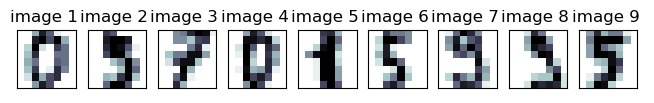

In [122]:
# Image Show
samples = [0, 5, 7, 36, 1, 25, 39, 31, 33]
d = []
for i in range(len(samples)):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(len(d)):
    plt.subplot(1, len(d), i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {} '.format(i + 1))
plt.tight_layout
plt.show()

## 3. Split Train data & Test data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [71]:
display(X_train.shape)
display(X_test.shape)
display(y_test.shape)
display(y_test.shape)

(1437, 64)

(360, 64)

(360,)

(360,)

## 4. Model Selection
- 최적의 파라미터를 찾기 위해 GridSearchCV를 사용했습니다.
- Metric은 F1 Score, Precision Score, Recall Score를 사용 하였습니다.
  - 다중 분류 문제이기 때문에 단순히 ACC SCORE로 가지고 평가하기는 무리가 있어보여 선택
  - 분류 모델들을 비교 할 경우 F1 스코어로 비교 할 시 편리함

In [196]:
def best_model(dt=None, rf=None, svm=None, sgd=None, lr=None):
    """_summary_
    
    Args:
        dt (_type_, optional): _description_. Defaults to None.
        rf (_type_, optional): _description_. Defaults to None.
        svm (_type_, optional): _description_. Defaults to None.
        sgd (_type_, optional): _description_. Defaults to None.
        lr (_type_, optional): _description_. Defaults to None.
        
    Output:
        best parameters
        best precision score
        best recall score
    """
    ###################
    ## Libary Import
    ###################
    from sklearn.datasets import load_digits
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn import metrics

    ###################
    ## Decision Trees
    ###################
    if dt:
        from sklearn.tree import DecisionTreeClassifier
        
        clf = DecisionTreeClassifier()
        params = {
            'max_depth':[1, 2, 3], 
            'min_samples_split':[2, 3]
        }
        grid_search = GridSearchCV(clf, param_grid=params, verbose=1, cv=3, refit=True, n_jobs=1)
        grid_search.fit(X_train, y_train)
        
    ###################
    ## Random Forest
    ###################
    elif rf:
        from sklearn.ensemble import RandomForestClassifier
        rfc = RandomForestClassifier()
        params = {
            'bootstrap': [True],
            'max_depth': [80, 90, 100, 110],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [100, 200, 300, 1000]
        }
        grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=3, n_jobs=1, verbose=1, refit=True)
        grid_search.fit(X_train, y_train)
    
    ###################
    ## SVM
    ###################
    elif svm:
        from sklearn import svm
        
        clf = svm.SVC()
        params = {
            'C':[0.001,0.01,0.1,1,10,100],
            'gamma':[0.001,0.01,0.1,1,10,100] 
        }

        grid_search = GridSearchCV(clf, param_grid=params, cv=3, refit=True, n_jobs=1)
        grid_search.fit(X_train, y_train)
        
    ###################
    ## SGD
    ###################
    elif sgd:
        from sklearn.linear_model import SGDClassifier
        sgdc = SGDClassifier()
        params = {
            "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
            "alpha" : [0.0001, 0.001, 0.01, 0.1],
            "penalty" : ["l2", "l1", "none"]
            }
        
        grid_search = GridSearchCV(sgdc, param_grid=params, cv=3, verbose=1, n_jobs=1, refit=True)
        grid_search.fit(X_train, y_train)
        
    #######################
    ## Logistic Regression
    #######################
    elif lr:
        from sklearn.linear_model import LogisticRegression
        
        clf = LogisticRegression()
        params={
            "C":np.logspace(-3,3,7), 
            "penalty":["l1","l2"]
        }
        grid_search = GridSearchCV(clf, param_grid=params, cv=3, verbose=1, n_jobs=1, refit=True)
        grid_search.fit(X_train, y_train)

    ####################
    ## Best Parameters
    ####################
    estimator = grid_search.best_estimator_
    pred = estimator.predict(X_test)
    
    
    precision_score = metrics.precision_score(y_test, pred, average='macro')
    recall_score = metrics.recall_score(y_test, pred, average='macro')
    f1_score = metrics.f1_score(y_test, pred, average='macro')
    
    print('GridSearchCV Best Parameters: {}'.format(grid_search.best_params_))
    print('GridSearchCV Best F1-Score: {0:0.4f}'.format(f1_score))
    
    print('GridSearchCV Best Precision Score: {0:0.4f}'.format(precision_score))
    print('GridSearchCV Best Recall Score: {0:0.4f}'.format(recall_score)) 

### 4-1. Desicion Tree

In [197]:
best_model(dt=True)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV Best F1-Score: 0.3962
GridSearchCV Best Precision Score: 0.4271
GridSearchCV Best Recall Score: 0.4719


### 4-2. Random Forest

In [198]:
best_model(rf=True)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
GridSearchCV Best Parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
GridSearchCV Best F1-Score: 0.9642
GridSearchCV Best Precision Score: 0.9643
GridSearchCV Best Recall Score: 0.9647


### 4-3. SVM

In [199]:
best_model(svm=True)

GridSearchCV Best Parameters: {'C': 1, 'gamma': 0.001}
GridSearchCV Best F1-Score: 0.9895
GridSearchCV Best Precision Score: 0.9897
GridSearchCV Best Recall Score: 0.9895


### 4-4. SGD Classifier

In [201]:
best_model(sgd=True)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
GridSearchCV Best Parameters: {'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
GridSearchCV Best F1-Score: 0.9610
GridSearchCV Best Precision Score: 0.9611
GridSearchCV Best Recall Score: 0.9616


### 4-5. Logistic Regression

In [202]:
best_model(lr=True)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
GridSearchCV Best Parameters: {'C': 0.01, 'penalty': 'l2'}
GridSearchCV Best F1-Score: 0.9764
GridSearchCV Best Precision Score: 0.9762
GridSearchCV Best Recall Score: 0.9769


## 5. Conlusion
    - Best Model : SVM (F1 Score: 0.9895, Precision Score: 0.9897, Recall Score: 0.9895)

#### 참고
- model:
    + GridSearch : https://scikit-learn.org/stable/modules/grid_search.html
    + sgd: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
        
- Metrics:
    - Metrics: https://deeesp.github.io/machine%20learning/Classification-Evaluation-Metrics/
